In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from IPython.display import display

In [19]:
address = QuantumRegister(2, 'address')
data = QuantumRegister(3, 'data')
c = ClassicalRegister(5, 'classic_output')
qc = QuantumCircuit(address,data,c)

In [21]:
provider = IBMQ.load_account()

def execute_circuit():
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend=backend, shots=8000, seed_simulator=12345, backend_options={"fusion_enable":True})
    #job = execute(qc, backend=backend, shots=8192)
    result = job.result()
    count =result.get_counts()
    print(count)

ibmqfactory.load_account:WARNING:2020-12-23 11:42:54,786: Credentials are already in use. The existing account in the session will be replaced.


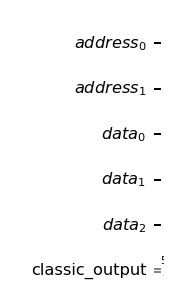

In [22]:
display(qc.draw(output="mpl"))

In [23]:
qc.h([address[0],address[1]])

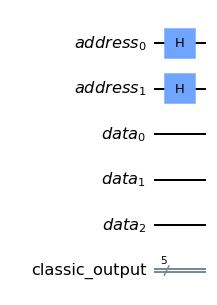

In [24]:
display(qc.draw(output="mpl"))

In [25]:
# address 0 -> data = 1
qc.x([address[0],address[1]])
qc.ccx(address[0],address[1],data[2])
qc.x([address[0],address[1]])

qc.measure(address[0:2], c[0:2])
qc.measure(data[0:3], c[2:5])
execute_circuit()

{'00001': 2008, '10000': 1964, '00010': 1989, '00011': 2039}


<ipython-input-21-118b50573ecd>:5: DeprecationWarning: Using `backend_options` kwarg has been deprecated as of qiskit-aer 0.7.0 and will be removed no earlier than 3 months from that release date. Runtime backend options should now be added directly using kwargs for each option.
  job = execute(qc, backend=backend, shots=8000, seed_simulator=12345, backend_options={"fusion_enable":True})


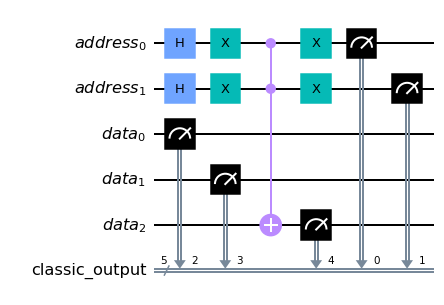

In [18]:
display(qc.draw(output="mpl"))
